In [34]:
import os
import glob
import pandas as pd
import chardet


In [35]:
data_folder = "../data/earning/"
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
dataframes = {}

for year in years:
    file_path = os.path.join(data_folder, f"{year}_earnings.csv")
    if os.path.exists(file_path):
        try:
            with open(file_path, 'rb') as f:
                raw_data = f.read()
                # result = chardet.detect(raw_data)
                # encoding = result['encoding']
                encoding = 'ISO-8859-1'
            df = pd.read_csv(file_path, encoding=encoding)
            dataframes[year] = df
            print(f"Successfully loaded {file_path} with encoding: {encoding}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    else:
        print(f"File for year {year} does not exist.")


Successfully loaded ../data/earning/2011_earnings.csv with encoding: ISO-8859-1
Successfully loaded ../data/earning/2012_earnings.csv with encoding: ISO-8859-1
Successfully loaded ../data/earning/2013_earnings.csv with encoding: ISO-8859-1
Successfully loaded ../data/earning/2014_earnings.csv with encoding: ISO-8859-1
Successfully loaded ../data/earning/2015_earnings.csv with encoding: ISO-8859-1
Successfully loaded ../data/earning/2016_earnings.csv with encoding: ISO-8859-1
Successfully loaded ../data/earning/2017_earnings.csv with encoding: ISO-8859-1
Successfully loaded ../data/earning/2018_earnings.csv with encoding: ISO-8859-1
Successfully loaded ../data/earning/2019_earnings.csv with encoding: ISO-8859-1
Successfully loaded ../data/earning/2020_earnings.csv with encoding: ISO-8859-1
Successfully loaded ../data/earning/2021_earnings.csv with encoding: ISO-8859-1
Successfully loaded ../data/earning/2022_earnings.csv with encoding: ISO-8859-1
Successfully loaded ../data/earning/2023

In [36]:
#print the data type of each column
for year, df in dataframes.items():
    print(f"\nData types for {year}:")
    print(df.dtypes)

# display random 10 rows from 2023
if 2012 in dataframes:
    print("\nSample data from 2021:")
    display(dataframes[2012].sample(10))


Data types for 2011:
ï»¿_id              int64
Name               object
Department Name    object
Title              object
Regular            object
Retro              object
Other              object
Overtime           object
Injured            object
Detail             object
Quinn              object
Total Earnings     object
Zip Code           object
dtype: object

Data types for 2012:
ï»¿_id             int64
NAME              object
DEPARTMENT        object
TITLE             object
REGULAR           object
RETRO             object
OTHER             object
OVERTIME          object
INJURED           object
DETAIL            object
QUINN             object
TOTAL EARNINGS    object
ZIP               object
dtype: object

Data types for 2013:
ï»¿_id             int64
NAME              object
TITLE             object
DEPARTMENT        object
REGULAR           object
RETRO             object
OTHER             object
OVERTIME          object
INJURED           object
DETAIL            

,ï»¿_id,NAME,DEPARTMENT,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN,TOTAL EARNINGS,ZIP
20986,20987,"Wright,Lindsey M",Boston Public Schools,Substitute Teacher,$35866.92,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$35866.92,02364-2154
21134,21135,"Wallace,Kellie A.",Boston Public Schools,Teacher,$51279.10,$0.00,$350.00,$0.00,$0.00,$0.00,$0.00,$51629.10,02122
14705,14706,"Dailey,Dorthy",Boston Public Schools,Paraprofessional,$30390.13,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$30390.13,02126-1016
11941,11942,"De Tuya,Oscar",Boston Public Schools,School Psychologist(1),$17682.71,$0.00,$329.92,$0.00,$0.00,$0.00,$0.00,$18012.63,02152-1445
15122,15123,"Ruane,Anna M.",Boston Public Schools,Teacher,$80054.42,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$80054.42,02136-4003
14444,14445,"Viteri,Mauricio",Boston Public Schools,Paraprofessional,$26976.99,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$26976.99,02131-1933
926,927,"Burris,Dana",Boston Cntr - Youth & Families,Streetworkers,$38054.82,$171.67,$0.00,$0.00,$0.00,$0.00,$0.00,$38226.49,02136-1546
7788,7789,"Neal,James",Boston Police Department,Police Sergeant/FgrPrt Ev Tech,$94280.81,$0.00,$12318.47,$37649.56,$0.00,$0.00,$0.00,$144248.84,02136-6202
1114,1115,"Tenney,Kimberly M.",Boston Public Library,Curator-Professional Lib IV,$63816.09,$0.00,$6085.08,$0.00,$0.00,$0.00,$0.00,$69901.17,02132-2422
4981,4982,"Leblanc,Paul R",Boston Fire Department,Fire Lieutenant,$106176.73,$0.00,$7129.09,$9731.56,$0.00,$0.00,$0.00,$123037.38,02151-2737


In [37]:
def unify_columns(df, year):
    df = df.copy()

    if '_id' in df.columns:
        df = df.drop('_id', axis=1)

    column_map = {
        'Name': 'NAME',

        'Department Name': 'DEPARTMENT_NAME',
        'DEPARTMENT': 'DEPARTMENT_NAME',
        'DEPARTMENT NAME': 'DEPARTMENT_NAME',

        'Title': 'TITLE',

        'Regular': 'REGULAR',

        'Retro': 'RETRO',

        'Other': 'OTHER',

        'Overtime': 'OVERTIME',

        'Injured': 'INJURED',

        'Detail': 'DETAIL',
        'DETAILS': 'DETAIL',

        'Total Earnings': 'TOTAL_GROSS',
        'TOTAL EARNINGS': 'TOTAL_GROSS',
        ' TOTAL EARNINGS ': 'TOTAL_GROSS',
        'TOTAL_ GROSS': 'TOTAL_GROSS',
        'TOTAL GROSS': 'TOTAL_GROSS',
        'TOTAL_GROSS': 'TOTAL_GROSS',

        'Quinn': 'QUINN_EDUCATION',
        'QUINN': 'QUINN_EDUCATION',
        'QUINN/EDUCATION INCENTIVE': 'QUINN_EDUCATION',
        ' QUINN/EDUCATION INCENTIVE ': 'QUINN_EDUCATION',
        ' QUINN / EDUCATION INCENTIVE ': 'QUINN_EDUCATION',
        'QUINN_EDUCATION_INCENTIVE': 'QUINN_EDUCATION',

        'Zip Code': 'POSTAL',
        'ZIP': 'POSTAL',

        ' REGULAR ': 'REGULAR',
        ' RETRO ': 'RETRO',
        ' OTHER ': 'OTHER',
        ' OVERTIME ': 'OVERTIME',
        ' INJURED ': 'INJURED',
        ' DETAIL ': 'DETAIL'
    }

    df = df.rename(columns=column_map)

    standard_columns = [
        'NAME',
        'DEPARTMENT_NAME',
        'TITLE',
        'REGULAR',
        'RETRO',
        'OTHER',
        'OVERTIME',
        'INJURED',
        'DETAIL',
        'QUINN_EDUCATION',
        'TOTAL_GROSS',
        'POSTAL'
    ]

    for col in standard_columns:
        if col not in df.columns:
            df[col] = pd.NA

    df = df[standard_columns]

    return df

unified_dataframes = {}
for year, df in dataframes.items():
    try:
        unified_df = unify_columns(df, year)
        unified_dataframes[year] = unified_df
        print(f"Successfully unified columns for year {year}")
    except Exception as e:
        print(f"Error unifying columns for year {year}: {e}")


columns_set = set(unified_dataframes[2011].columns)
for year, df in unified_dataframes.items():
    if set(df.columns) != columns_set:
        print(f"Column mismatch for year {year}")
    else:
        print(f"Columns match for year {year}")

Successfully unified columns for year 2011
Successfully unified columns for year 2012
Successfully unified columns for year 2013
Successfully unified columns for year 2014
Successfully unified columns for year 2015
Successfully unified columns for year 2016
Successfully unified columns for year 2017
Successfully unified columns for year 2018
Successfully unified columns for year 2019
Successfully unified columns for year 2020
Successfully unified columns for year 2021
Successfully unified columns for year 2022
Successfully unified columns for year 2023
Columns match for year 2011
Columns match for year 2012
Columns match for year 2013
Columns match for year 2014
Columns match for year 2015
Columns match for year 2016
Columns match for year 2017
Columns match for year 2018
Columns match for year 2019
Columns match for year 2020
Columns match for year 2021
Columns match for year 2022
Columns match for year 2023


In [38]:
object_columns = ['REGULAR','RETRO','OTHER','OVERTIME','INJURED','DETAIL','QUINN_EDUCATION','TOTAL_GROSS',]

for year, df in unified_dataframes.items():
    for col in object_columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col].astype(str).str.replace('[$,]', '', regex=True), errors='coerce')

display(unified_dataframes[2012].sample(10))

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_GROSS,POSTAL
18250,"Drurey,Suzy S",Boston Public Schools,Teacher,0.00,0.00,6004.79,0.00,0.0,0.0,0.00,6004.79,01760-2607
1992,"Boscana,Santos",Inspectional Services Dept,Envrnmntl Health Inspector I,62382.93,453.25,3001.24,2643.97,0.0,0.0,0.00,68481.39,02118-1576
15299,"Bhatti,Nadia",Boston Public Schools,Teacher,15803.11,0.00,0.00,0.00,0.0,0.0,0.00,15803.11,02138-6803
21050,"Walker-Brown,Desiree P.",Boston Public Schools,Teacher,77756.09,0.00,585.00,0.00,0.0,0.0,0.00,78341.09,02676
16305,"Arsenault,Nancy J",Boston Public Schools,Teacher,79738.46,0.00,500.00,0.00,0.0,0.0,0.00,80238.46,02152-1919
2908,"Mathieson,Jeffrey Paul",Property Management,Security Offc (Prot Ser),43692.35,516.22,1350.33,28533.40,0.0,7200.0,0.00,81292.30,02128-2720
18879,"Arinella,Jeffrey D.",Boston Public Schools,Teacher,51774.61,0.00,300.00,0.00,0.0,0.0,0.00,52074.61,02128-1241
6466,"Donofrio,Edward J",Boston Police Department,Police Offc/Auto Invest 4$10,7625.49,0.00,32656.01,0.00,0.0,3474.0,684.59,44440.09,02359-2011
8474,"Tibets,Harold",Boston Police Department,Police Officer,59121.08,0.00,0.00,4960.44,0.0,6009.0,0.00,70090.52,02127-2353
611,"Brown,Charles",Boston Cntr - Youth & Families,CertifiedSeasonalCounslrCampJo,1656.00,0.00,0.00,0.00,0.0,0.0,0.00,1656.00,02125-3001


In [39]:
print("Unified column names:")
print(unified_dataframes[2011].columns.tolist())
for year, df in unified_dataframes.items():
    print(f"\nData types for {year}:")
    print(df.dtypes)

Unified column names:
['NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_GROSS', 'POSTAL']

Data types for 2011:
NAME                object
DEPARTMENT_NAME     object
TITLE               object
REGULAR            float64
RETRO              float64
OTHER              float64
OVERTIME           float64
INJURED            float64
DETAIL             float64
QUINN_EDUCATION    float64
TOTAL_GROSS        float64
POSTAL              object
dtype: object

Data types for 2012:
NAME                object
DEPARTMENT_NAME     object
TITLE               object
REGULAR            float64
RETRO              float64
OTHER              float64
OVERTIME           float64
INJURED            float64
DETAIL             float64
QUINN_EDUCATION    float64
TOTAL_GROSS        float64
POSTAL              object
dtype: object

Data types for 2013:
NAME                object
DEPARTMENT_NAME     object
TITLE               object
REGULAR     

In [40]:
#get the unique values in the DEPARTMENT_NAME column
for year, df in unified_dataframes.items():
    unique_departments = df['DEPARTMENT_NAME'].unique()

#get the DEPARTMENT_NAME that appears in every year
    common_departments = set(unique_departments)
    if year == 2011:
        common_departments = set(unique_departments)
    else:
        common_departments.intersection_update(unique_departments)

#for each year, based on the unique values in the DEPARTMENT_NAME column, compute the sum of the TOTAL_GROSS and OVERTIME columns, then store the result in a new dataframe set, with the year as the key
department_summaries = {}
for year, df in unified_dataframes.items():
    department_summary = df.groupby('DEPARTMENT_NAME')[['TOTAL_GROSS', 'OVERTIME']].sum().reset_index()
    department_summaries[year] = department_summary


display(department_summaries[2012].sample(10))


,DEPARTMENT_NAME,TOTAL_GROSS,OVERTIME
21,Elderly Commission,3.394629e+06,11681.05
43,Transportation-Parking Clerk,2.696268e+06,6757.11
16,City Clerk,9.881349e+05,499.66
40,Small & Local Business,5.688941e+05,0.00
0,ASD Human Resources,3.357534e+06,0.00
29,Mayor's Office-Public Info,1.082403e+06,0.00
2,ASD Office Of Labor Relation,7.264613e+05,0.00
46,Veterans' Services,6.906390e+05,0.00
38,Public Works Department,2.083954e+07,1727033.69
12,Boston Police Department,2.958616e+08,44697415.97


In [41]:
# In each year, keep the five departments with the most overtime pay
top_departments = {}
for year, df in department_summaries.items():
    # Changed from 50 to 5 to match the actual requirement
    top_departments[year] = df.nlargest(5, 'OVERTIME')['DEPARTMENT_NAME'].tolist()

# Create a DataFrame to store the data for the top 5 departments in each year
top_department_data = {}
for year, df in department_summaries.items():
    top_dept = top_departments[year]
    # Filter to only include departments in the top 5 for the current year
    top_department_data[year] = df[df['DEPARTMENT_NAME'].isin(top_dept)]

# Find departments that appear in the top 5 every year
# Start with the departments from the first year
first_year = min(top_department_data.keys())
common_departments = set(top_departments[first_year])

# Find the intersection of departments across all years
for year in top_departments:
    if year != first_year:  # Skip the first year since we already used it
        common_departments = common_departments.intersection(set(top_departments[year]))

print(f"Departments in top 5 for overtime in every year: {common_departments}")

# Filter top_department_data to only include common departments
for year, df in top_department_data.items():
    top_department_data[year] = df[df['DEPARTMENT_NAME'].isin(common_departments)]

# Create a DataFrame for each department
department_dataframes = {}
for dept in common_departments:
    # Initialize an empty list to store data for this department
    dept_data = []

    # Collect data for this department across all years
    for year, df in top_department_data.items():
        # Get the row for this department in this year
        dept_row = df[df['DEPARTMENT_NAME'] == dept]

        if not dept_row.empty:
            # Add year as a column and append to the department's data
            dept_row = dept_row.copy()
            dept_row['YEAR'] = year
            dept_data.append(dept_row)

    # Concatenate all years' data for this department into a single DataFrame
    if dept_data:
        department_dataframes[dept] = pd.concat(dept_data, ignore_index=True)

# Display the department DataFrames
for dept, df in department_dataframes.items():
    print(f"\nDataFrame for {dept}:")
    display(df)

Departments in top 5 for overtime in every year: {'Boston Fire Department', 'Property Management', 'Boston Police Department', 'Public Works Department'}

DataFrame for Boston Fire Department:


,DEPARTMENT_NAME,TOTAL_GROSS,OVERTIME,YEAR
0,Boston Fire Department,1.731703e+08,20940928.99,2011
1,Boston Fire Department,1.791011e+08,21408244.96,2012
2,Boston Fire Department,1.778649e+08,20388822.87,2013
3,Boston Fire Department,2.097233e+08,21318731.45,2014
4,Boston Fire Department,2.094536e+08,24815833.23,2015
5,Boston Fire Department,2.114572e+08,23762982.32,2016
6,Boston Fire Department,2.151573e+08,22829249.92,2017
7,Boston Fire Department,2.199342e+08,23679890.59,2018
8,Boston Fire Department,2.655112e+08,30274873.99,2019
9,Boston Fire Department,2.642356e+08,33761132.79,2020



DataFrame for Property Management:


,DEPARTMENT_NAME,TOTAL_GROSS,OVERTIME,YEAR
0,Property Management,14173062.33,1509684.21,2011
1,Property Management,14727492.81,1771431.66,2012
2,Property Management,15225876.72,2136854.78,2013
3,Property Management,15103896.30,1948891.72,2014
4,Property Management,14867023.90,2131552.41,2015
5,Property Management,10103922.14,1814680.76,2016
6,Property Management,10570764.93,1917753.05,2017
7,Property Management,11080659.67,1943773.68,2018
8,Property Management,11006087.59,2075398.70,2019
9,Property Management,10775455.78,2506471.06,2020



DataFrame for Boston Police Department:


,DEPARTMENT_NAME,TOTAL_GROSS,OVERTIME,YEAR
0,Boston Police Department,2.905179e+08,42237360.79,2011
1,Boston Police Department,2.958616e+08,44697415.97,2012
2,Boston Police Department,3.077962e+08,57483767.63,2013
3,Boston Police Department,3.578099e+08,57914605.89,2014
4,Boston Police Department,3.581379e+08,61608144.93,2015
5,Boston Police Department,3.885872e+08,60989917.25,2016
6,Boston Police Department,3.912776e+08,66933649.87,2017
7,Boston Police Department,4.166830e+08,77855435.98,2018
8,Boston Police Department,4.157256e+08,77764302.51,2019
9,Boston Police Department,4.162761e+08,78057696.23,2020



DataFrame for Public Works Department:


,DEPARTMENT_NAME,TOTAL_GROSS,OVERTIME,YEAR
0,Public Works Department,21637431.56,2936045.81,2011
1,Public Works Department,20839543.57,1727033.69,2012
2,Public Works Department,22160388.68,3149769.31,2013
3,Public Works Department,24888293.92,3833240.06,2014
4,Public Works Department,27029986.10,5243898.07,2015
5,Public Works Department,25931149.01,4161927.40,2016
6,Public Works Department,26674448.16,5114656.36,2017
7,Public Works Department,27067680.29,5255554.84,2018
8,Public Works Department,26285862.95,4506512.51,2019
9,Public Works Department,26098861.91,3444542.88,2020


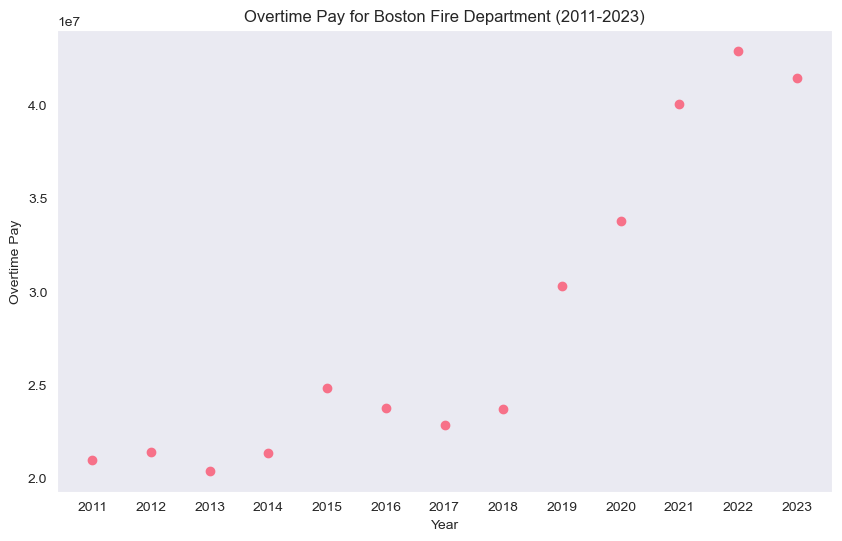

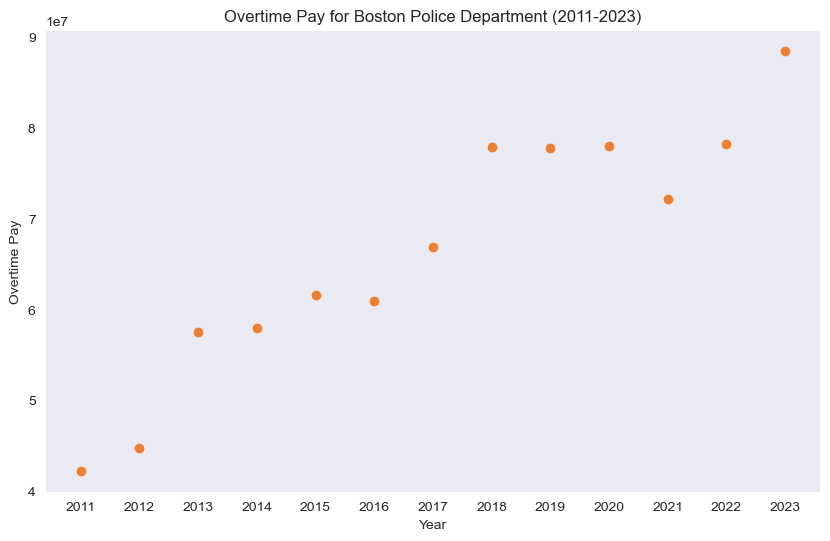

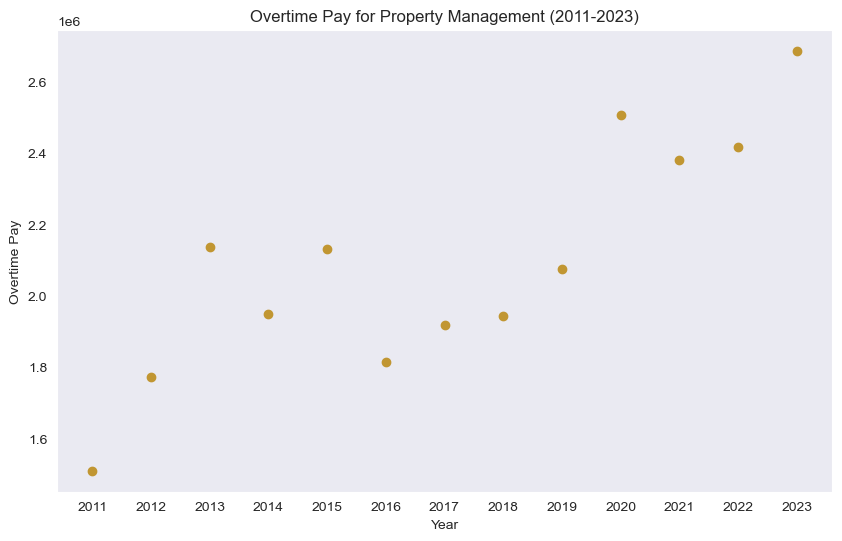

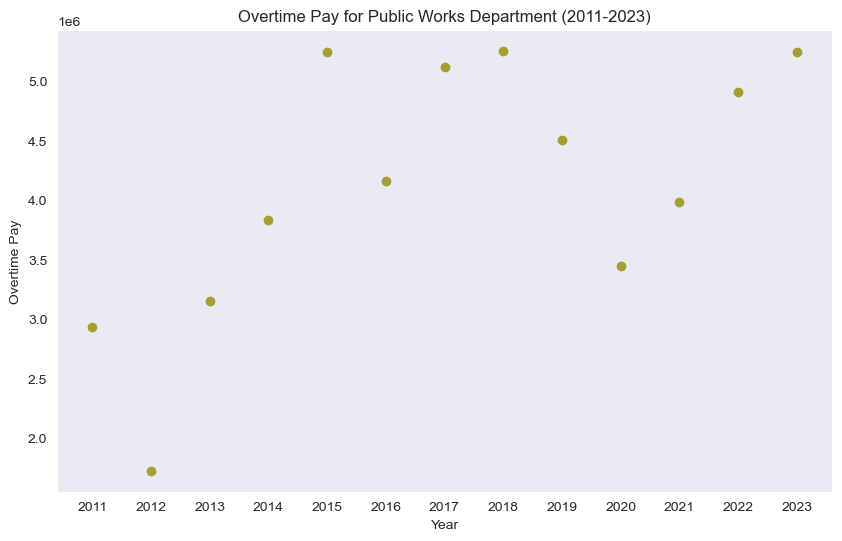

In [42]:
import seaborn as sns

def plot_department_overtime(top_department_data):
    palette = sns.color_palette("husl", len(top_department_data))

    for i, department in enumerate(top_department_data[2011]['DEPARTMENT_NAME']):
        plt.figure(figsize=(10, 6))

        for year, df in top_department_data.items():
            if department in df['DEPARTMENT_NAME'].values:
                plt.plot(year, df[df['DEPARTMENT_NAME'] == department]['OVERTIME'].values[0], marker='o', label=department, color=palette[i])

        plt.title(f"Overtime Pay for {department} (2011-2023)")
        plt.xlabel("Year")
        plt.ylabel("Overtime Pay")
        plt.xticks(years)
        plt.grid()
        plt.show()

plot_department_overtime(top_department_data)

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def polynomial_regression_forecast(
    df,
    x_column,
    y_column,
    forecast_years=2,
    test_degrees=[2, 3, 4],
    title="Polynomial Regression Forecast",
    y_label="Value",
    figsize=(12, 8),
    currency_format=True,
    yoy_analysis=True
):
    """
    Perform polynomial regression on time series data and forecast future values.

    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing the time series data
    x_column : str
        The name of the column containing the years/dates
    y_column : str
        The name of the column containing the values to forecast
    forecast_years : int, default=2
        The number of years to forecast into the future
    test_degrees : list, default=[2, 3, 4]
        List of polynomial degrees to test
    title : str, default="Polynomial Regression Forecast"
        The title of the main plot
    y_label : str, default="Value"
        The label for the y-axis
    figsize : tuple, default=(12, 8)
        The size of the figure
    currency_format : bool, default=True
        Whether to format y-axis as currency (with $ and M for millions)
    yoy_analysis : bool, default=True
        Whether to create a year-over-year percentage change plot

    Returns:
    --------
    dict
        A dictionary containing the results of the analysis:
        - 'best_degree': The best polynomial degree
        - 'best_model': The trained model with the best fit
        - 'predictions': Dictionary of predictions for each model
        - 'future_predictions': Forecasted values
        - 'equation': The equation of the best model
        - 'metrics': Dictionary of metrics (R², MSE) for each model
    """
    # Extract data from dataframe
    years = df[x_column].values
    values = df[y_column].values

    # Reshape the data for sklearn
    X = years.reshape(-1, 1)
    y = values

    # Create a figure for visualization
    plt.figure(figsize=figsize)

    # Plot original data
    plt.scatter(years, values, color='orange', label='Original data')
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_label)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Prepare results
    models = {}
    predictions = {}
    metrics = {}
    colors = ['blue', 'green', 'red', 'purple', 'cyan']  # More colors for more degrees

    # Get the last year in the data
    last_year = int(years[-1])

    # Create future years array for predictions
    future_years = np.array(range(int(years[0]), last_year + forecast_years + 1)).reshape(-1, 1)

    # Try different polynomial degrees and find the best fit
    for i, degree in enumerate(test_degrees):
        color_idx = i % len(colors)  # Use modulo to cycle through colors if more degrees than colors

        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(X)

        # Fit the model
        model = LinearRegression()
        model.fit(X_poly, y)
        models[degree] = model

        # Make predictions for the training data
        y_pred = model.predict(X_poly)
        predictions[degree] = y_pred

        # Calculate metrics
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        metrics[degree] = {'mse': mse, 'r2': r2}

        # Make predictions for future years
        future_poly = poly_features.transform(future_years)
        future_pred = model.predict(future_poly)

        # Plot the polynomial fit
        plt.plot(future_years, future_pred, color=colors[color_idx],
                label=f'Degree {degree} (R² = {r2:.4f}, MSE = {mse:.2e})')

    # Find the best model based on R² score
    best_degree = max(models.keys(), key=lambda d: metrics[d]['r2'])
    print(f"Best polynomial degree: {best_degree}")

    # Get the best model
    best_model = models[best_degree]

    # Predict future values using the best model
    poly_features = PolynomialFeatures(degree=best_degree)
    poly_features.fit(X)  # Fit the transformer first
    future_years_pred = np.array(range(last_year + 1, last_year + forecast_years + 1)).reshape(-1, 1)
    future_poly = poly_features.transform(future_years_pred)
    future_predictions = best_model.predict(future_poly)

    # Print future predictions
    print("\nPredicted future values:")
    if currency_format:
        for year, pred in zip(future_years_pred.flatten(), future_predictions):
            print(f"Year {int(year)}: ${pred:,.2f}")
    else:
        for year, pred in zip(future_years_pred.flatten(), future_predictions):
            print(f"Year {int(year)}: {pred:,.2f}")

    # Display the best model's coefficients
    best_poly_features = PolynomialFeatures(degree=best_degree)
    X_best_poly = best_poly_features.fit_transform(X)
    coefficients = best_model.coef_
    intercept = best_model.intercept_

    print("\nBest model equation:")
    equation = f"y = {intercept:.2e}"
    for i, coef in enumerate(coefficients[1:], 1):
        equation += f" + {coef:.2e}x^{i}"
    print(equation)

    # Highlight forecast region
    forecast_years_array = np.array(range(last_year, last_year + forecast_years + 1))
    forecast_poly = poly_features.transform(forecast_years_array.reshape(-1, 1))
    forecast_values = best_model.predict(forecast_poly)
    plt.fill_between(forecast_years_array, forecast_values, alpha=0.2, color='gray', label='Forecast region')

    # Add a vertical line at the last actual data point
    plt.axvline(x=last_year, color='black', linestyle='--', alpha=0.5, label=f'Last data point ({last_year})')

    # Format y-axis with millions if currency format is enabled
    if currency_format:
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1e6:.0f}M'))

    plt.legend()
    plt.tight_layout()
    plt.show()

    # Additional analysis: Year-over-year percentage change
    if yoy_analysis and len(values) > 1:
        yoy_change = np.diff(values) / values[:-1] * 100

        plt.figure(figsize=(12, 6))
        plt.bar(years[1:], yoy_change, color='skyblue')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        plt.title(f'Year-over-Year Percentage Change in {y_label}')
        plt.xlabel(x_column)
        plt.ylabel('Percentage Change (%)')
        plt.grid(True, linestyle='--', alpha=0.7)

        for i, value in enumerate(yoy_change):
            plt.text(years[i+1], value + (2 if value > 0 else -5), f'{value:.1f}%', ha='center')

        plt.tight_layout()
        plt.show()

    # Return the results
    return {
        'best_degree': best_degree,
        'best_model': best_model,
        'predictions': predictions,
        'future_predictions': future_predictions,
        'equation': equation,
        'metrics': metrics
    }

Best polynomial degree: 4

Predicted future values:
Year 2024: $48,228,192.38
Year 2025: $52,225,158.67

Best model equation:
y = 1.82e+13 + -9.68e+03x^1 + -2.67e+07x^2 + 1.76e+04x^3 + -3.25e+00x^4


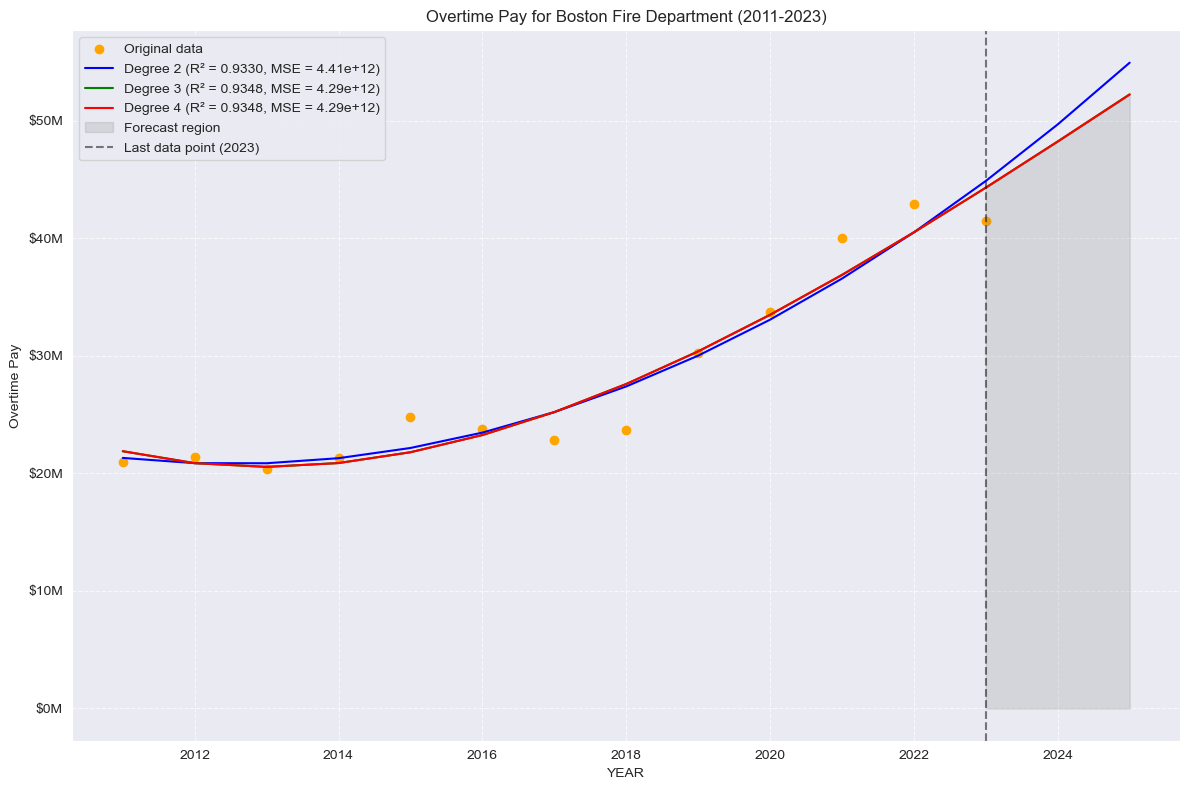

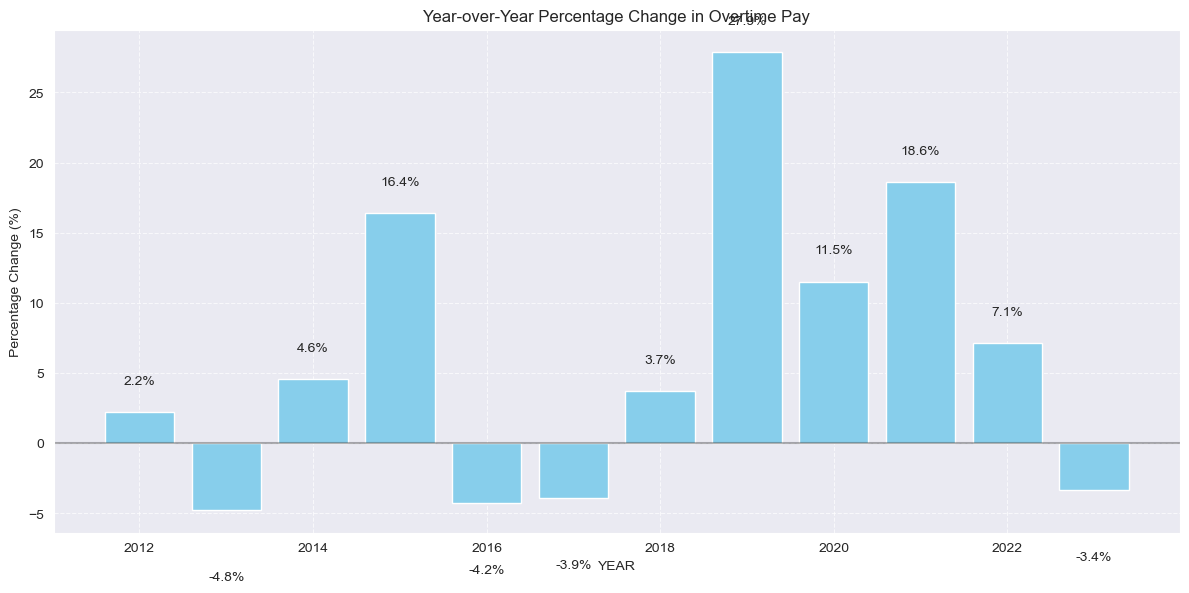


Forecast summary:
Best degree polynomial: 4
R² score: 0.9348
Equation: y = 1.82e+13 + -9.68e+03x^1 + -2.67e+07x^2 + 1.76e+04x^3 + -3.25e+00x^4


In [45]:
# Select the department to analyze
department_to_analyze = 'Boston Fire Department'
if department_to_analyze in department_dataframes:
    df = department_dataframes[department_to_analyze]

# Run the analysis
results = polynomial_regression_forecast(
    df=df,
    x_column='YEAR',
    y_column='OVERTIME',
    forecast_years=2,
    test_degrees=[2, 3, 4],
    title='Overtime Pay for Boston Fire Department (2011-2023)',
    y_label='Overtime Pay'
)

# Access the results
print(f"\nForecast summary:")
print(f"Best degree polynomial: {results['best_degree']}")
print(f"R² score: {results['metrics'][results['best_degree']]['r2']:.4f}")
print(f"Equation: {results['equation']}")

Best polynomial degree: 4

Predicted future values:
Year 2024: $88,282,388.94
Year 2025: $92,533,622.70

Best model equation:
y = -4.76e+13 + 2.54e+04x^1 + 7.00e+07x^2 + -4.62e+04x^3 + 8.59e+00x^4


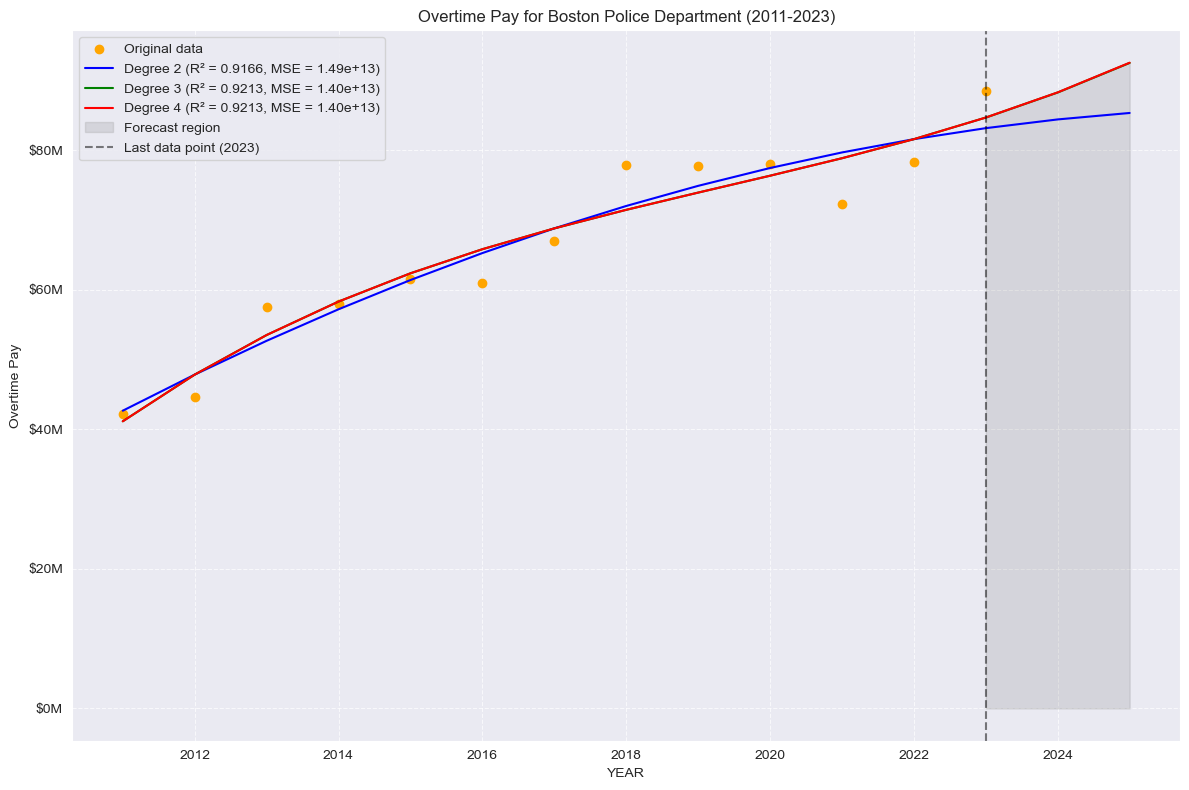

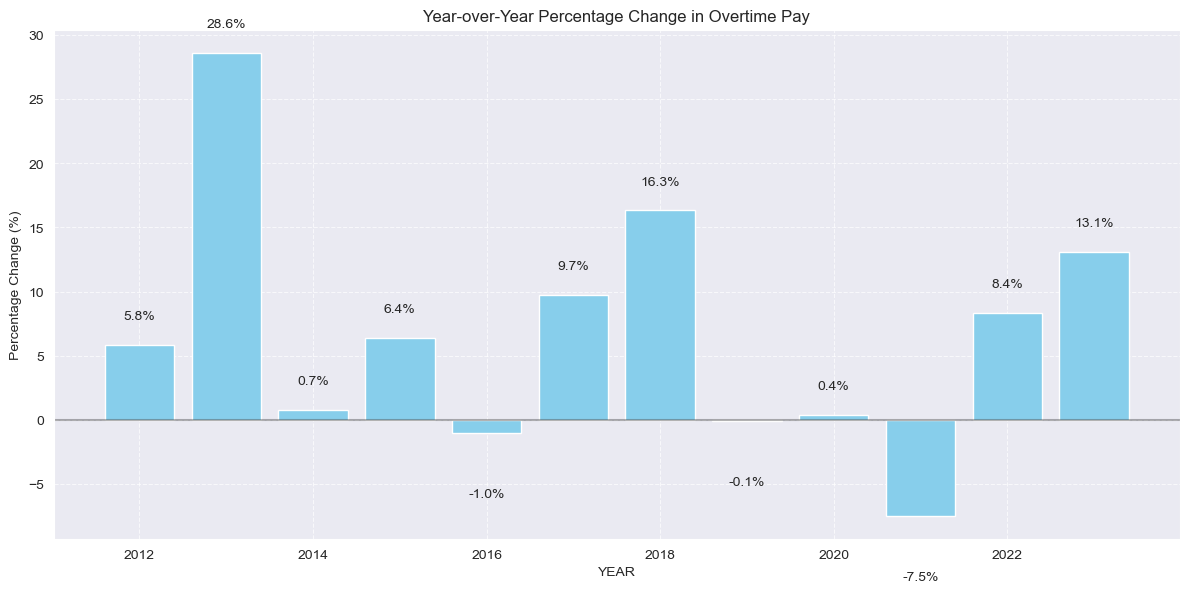


Forecast summary:
Best degree polynomial: 4
R² score: 0.9213
Equation: y = -4.76e+13 + 2.54e+04x^1 + 7.00e+07x^2 + -4.62e+04x^3 + 8.59e+00x^4


In [46]:
# Select the department to analyze
department_to_analyze = 'Boston Police Department'
if department_to_analyze in department_dataframes:
    df = department_dataframes[department_to_analyze]

# Run the analysis
results = polynomial_regression_forecast(
    df=df,
    x_column='YEAR',
    y_column='OVERTIME',
    forecast_years=2,
    test_degrees=[2, 3, 4],
    title='Overtime Pay for Boston Police Department (2011-2023)',
    y_label='Overtime Pay'
)

# Access the results
print(f"\nForecast summary:")
print(f"Best degree polynomial: {results['best_degree']}")
print(f"R² score: {results['metrics'][results['best_degree']]['r2']:.4f}")
print(f"Equation: {results['equation']}")

Best polynomial degree: 4

Predicted future values:
Year 2024: $5,464,298.58
Year 2025: $6,208,636.55

Best model equation:
y = -1.46e+13 + 7.82e+03x^1 + 2.15e+07x^2 + -1.42e+04x^3 + 2.64e+00x^4


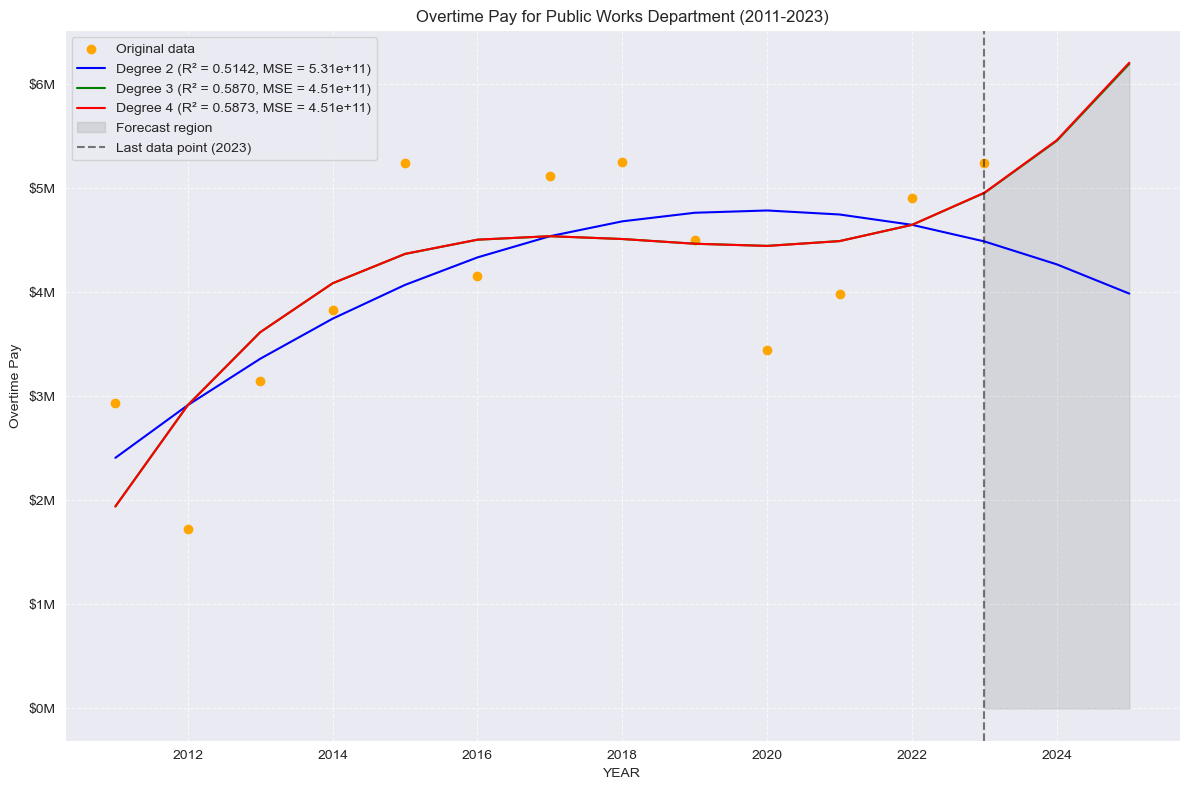

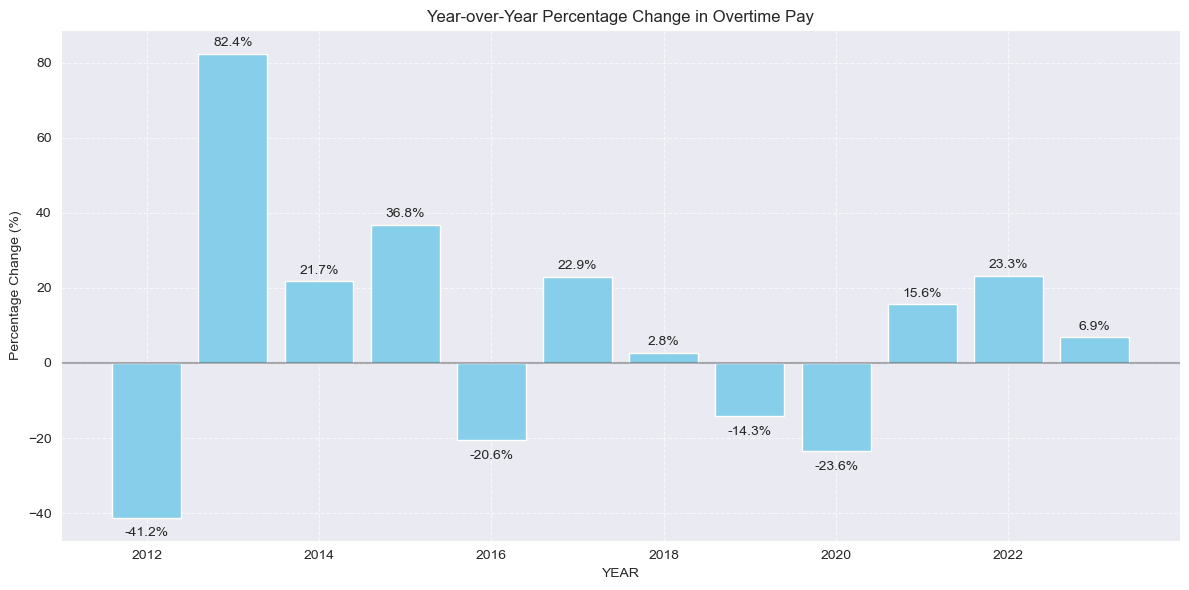


Forecast summary:
Best degree polynomial: 4
R² score: 0.5873
Equation: y = -1.46e+13 + 7.82e+03x^1 + 2.15e+07x^2 + -1.42e+04x^3 + 2.64e+00x^4


In [48]:
# Select the department to analyze
department_to_analyze = 'Public Works Department'
if department_to_analyze in department_dataframes:
    df = department_dataframes[department_to_analyze]

# Run the analysis
results = polynomial_regression_forecast(
    df=df,
    x_column='YEAR',
    y_column='OVERTIME',
    forecast_years=2,
    test_degrees=[2, 3, 4],
    title='Overtime Pay for Public Works Department (2011-2023)',
    y_label='Overtime Pay'
)

# Access the results
print(f"\nForecast summary:")
print(f"Best degree polynomial: {results['best_degree']}")
print(f"R² score: {results['metrics'][results['best_degree']]['r2']:.4f}")
print(f"Equation: {results['equation']}")

Best polynomial degree: 3

Predicted future values:
Year 2024: $3,060,206.97
Year 2025: $3,476,248.02

Best model equation:
y = -1.65e+13 + 2.45e+10x^1 + -1.22e+07x^2 + 2.01e+03x^3


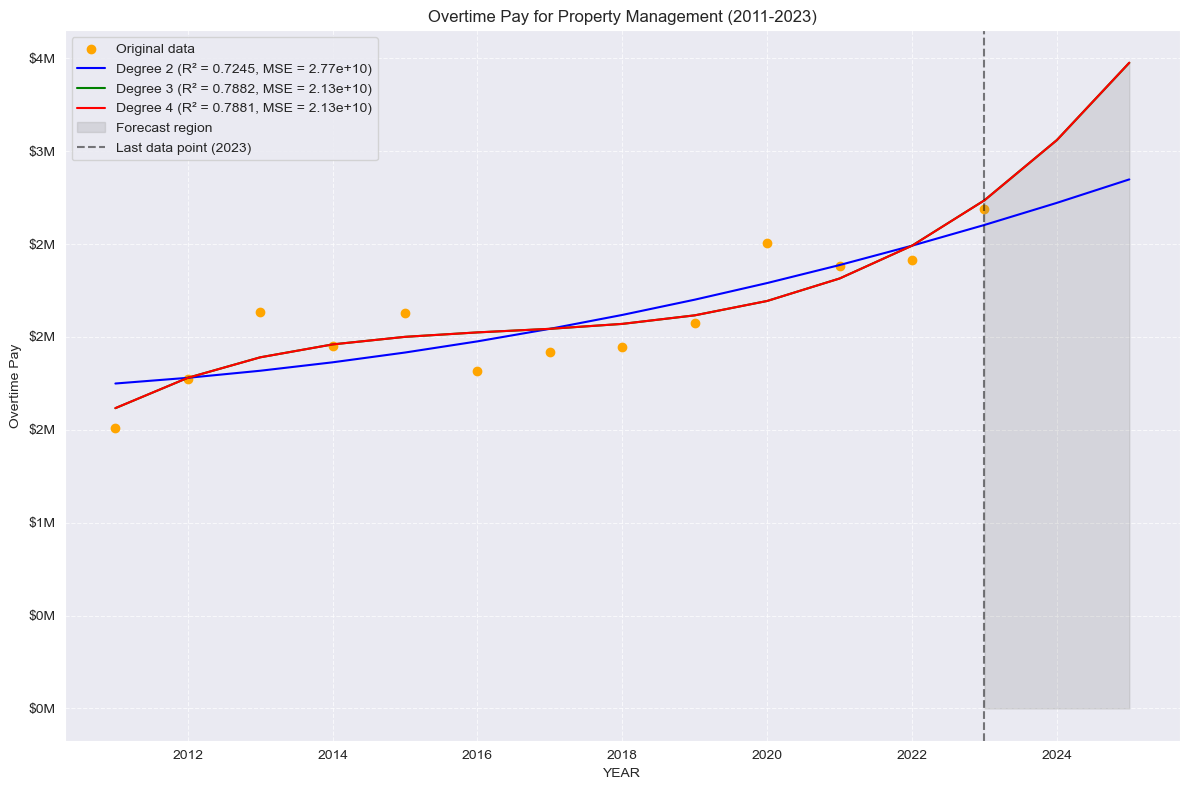

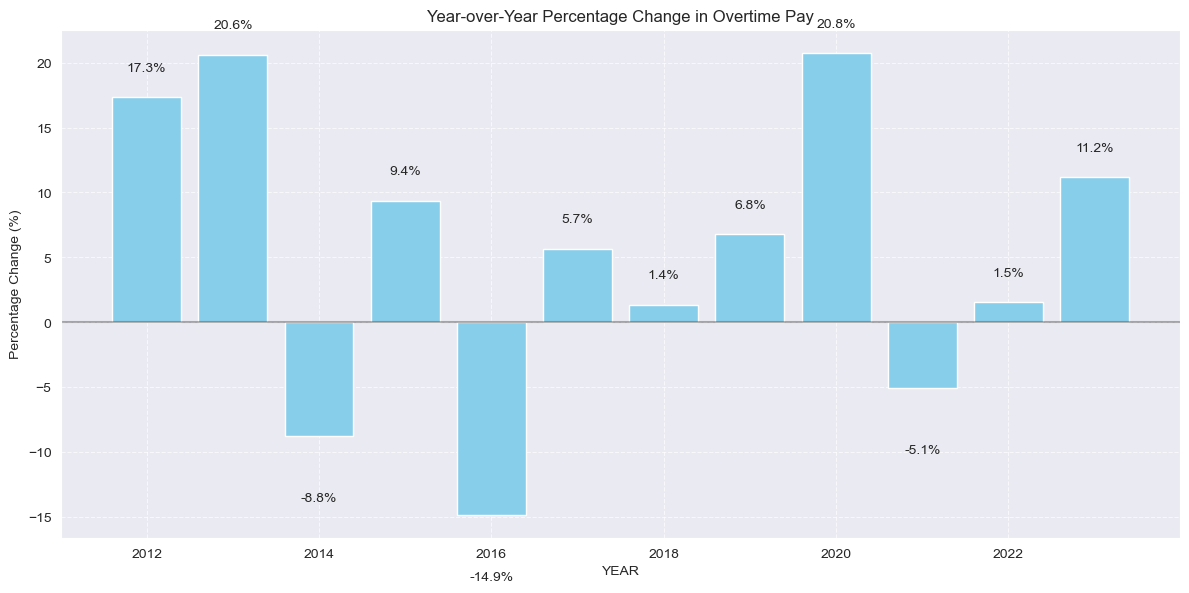


Forecast summary:
Best degree polynomial: 3
R² score: 0.7882
Equation: y = -1.65e+13 + 2.45e+10x^1 + -1.22e+07x^2 + 2.01e+03x^3


In [49]:
# Select the department to analyze
department_to_analyze = 'Property Management'
if department_to_analyze in department_dataframes:
    df = department_dataframes[department_to_analyze]

# Run the analysis
results = polynomial_regression_forecast(
    df=df,
    x_column='YEAR',
    y_column='OVERTIME',
    forecast_years=2,
    test_degrees=[2, 3, 4],
    title='Overtime Pay for Property Management (2011-2023)',
    y_label='Overtime Pay'
)

# Access the results
print(f"\nForecast summary:")
print(f"Best degree polynomial: {results['best_degree']}")
print(f"R² score: {results['metrics'][results['best_degree']]['r2']:.4f}")
print(f"Equation: {results['equation']}")